## Music Genre Predictor Change Log

#### 18/02/25
- For this model I am going to use K Means Clustering (KMC).
- This dataset was obtained from kaggle (https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db/data) however it is data that was directly pulled from Spotify's API.
- This dataset contains roughly 232,000 rows of data.
- I chose to use KMC for this model as it handles larger dataset well and it works particularly well with numerical data.
- My aim for this is to be able to predict what genre a song is in based off of the data I give it.

#### 25/02/25
- I researched into the columns and what all of them mean so that I can get a better understanding of my dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('SpotifyFeatures.csv')
print(ds.columns)
# This is just importing the data and printing the first 5 rows of the data to ensure that the data is imported correctly - AD

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


### Column Breakdown:
- genre: This is the target value, genre that the song belongs too
- artist_name: The name of the artist who performed the track.
- track_name: The title of the track.
- track_id: A unique identifier assigned to the track by Spotify.
- popularity: A numerical value indicating the track's popularity on Spotify.
- acousticness: A measure from 0 to 1 of the likelihood that the track is acoustic.
- danceability: A measure from 0 to 1 of how suitable the track is for dancing.
- duration_ms: The length of the track in milliseconds.
- energy: A measure from 0 to 1 of the track's intensity and activity.
- instrumentalness: A measure from 0 to 1 indicating the likelihood that the track is instrumental.
- key: The key in which the track is composed, represented as an number.
- liveness: A measure from 0 to 1 indicating the presence of a live audience in the recording.
- loudness: The overall loudness of the track in decibels.
- mode: Indicates the modality of the track: 1 for major, 0 for minor.
- speechiness: A measure from 0 to 1 of the presence of spoken words in the track.
- tempo: The speed of the track in beats per minute.
- time_signature: An integer representing the number of beats in each bar.
- valence: A measure from 0 to 1 of the musical positiveness conveyed by the track.

This took me about 20 minutes to fully understand all of these columns and what they mean.

In [3]:
from sklearn.preprocessing import LabelEncoder
# Drop the unnecessary columns

ds = ds.drop(columns=["track_id", "track_name", "artist_name", "time_signature"])

# Create and fit label encoder
encoder = LabelEncoder()
ds["genre_encoded"] = encoder.fit_transform(ds["genre"])
ds["Mode_encoded"] = encoder.fit_transform(ds["mode"])
ds["Key_encoded"] = encoder.fit_transform(ds["key"])

# Retrieve the mapping
genre_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display mapping
print(genre_mapping)

{'A': np.int64(0), 'A#': np.int64(1), 'B': np.int64(2), 'C': np.int64(3), 'C#': np.int64(4), 'D': np.int64(5), 'D#': np.int64(6), 'E': np.int64(7), 'F': np.int64(8), 'F#': np.int64(9), 'G': np.int64(10), 'G#': np.int64(11)}


I am dropping the track ID, track name and artist name as they arent predictive fields and dont really give me any benefit.

I am then label encoding the genre field as KMC works better with numerical values, as you can see in the output this works by assigning each genre a value that correlates to it.

I learned how to do this by reading through Sk-Learns docs here - (https://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [4]:
from sklearn.preprocessing import StandardScaler
X = ds[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
        'instrumentalness', 'Key_encoded', 'liveness', 'loudness', 'Mode_encoded', 
        'speechiness', 'tempo', 'valence', 'genre_encoded']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features


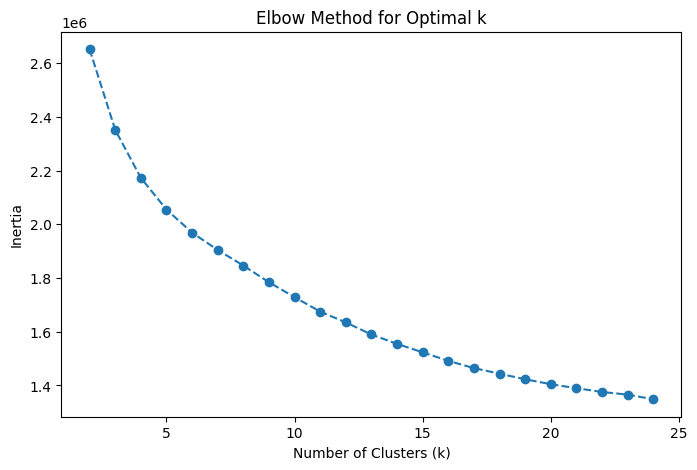

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 25)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#  This method was explained to me by ChatGPT, it is a method to determine the optimal number of clusters for the data. The optimal point to choose for the cluster is where the slope starts tailing off so in this example it would be 6/7 - AD

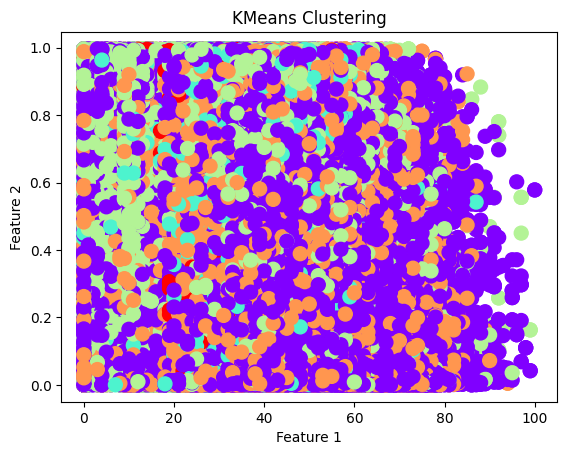

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy array
X_np = X.to_numpy() # This line was added by chatGPT to convert the dataframe to a numpy array as I was having issues figuring out why it wouldn't plot - AD

est = KMeans(n_clusters=6, random_state=42)
est.fit(X_np)

y_kmeans = est.predict(X_np)

plt.scatter(X_np[:, 0], X_np[:, 1], c=y_kmeans, s=100, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering")
plt.show()



As can be seen in the scatter plot above, the data isn't clustering very well. I believe this to be because there are too many columns in my dataset. 

However I do want to research and see if I can find any methods that might help fix the current issue with the data not clustering.

ChatGPT gave me the code block below. Principal Component Analysis (PCA) works by 

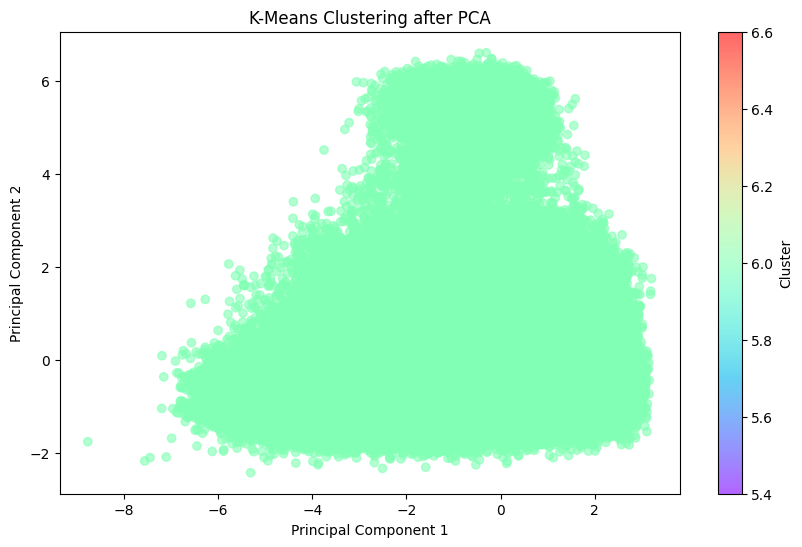

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualisation
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)  # Use standardized features

# Convert to DataFrame for easy plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca['Cluster'] = 6  # Add cluster labels

# Scatter plot of PCA components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='rainbow', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering after PCA")
plt.colorbar(label="Cluster")
plt.show()
